<a href="https://colab.research.google.com/github/princegod1/A-Tic-tac-toe-game/blob/main/logisticprj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Iteration 0, Cost: 0.6931471805599453
Iteration 100, Cost: nan
Iteration 200, Cost: nan
Iteration 300, Cost: nan


<ipython-input-1-4573b2b3d774>:23: RuntimeWarning: divide by zero encountered in log
  cost = -1/m * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
<ipython-input-1-4573b2b3d774>:23: RuntimeWarning: invalid value encountered in multiply
  cost = -1/m * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
<ipython-input-1-4573b2b3d774>:15: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration 400, Cost: nan
Iteration 500, Cost: nan
Iteration 600, Cost: nan
Iteration 700, Cost: nan
Iteration 800, Cost: nan
Iteration 900, Cost: nan
Iteration 1000, Cost: nan
Iteration 1100, Cost: nan
Iteration 1200, Cost: nan
Iteration 1300, Cost: nan
Iteration 1400, Cost: nan
Iteration 1500, Cost: nan
Iteration 1600, Cost: nan
Iteration 1700, Cost: nan
Iteration 1800, Cost: nan
Iteration 1900, Cost: nan
Iteration 2000, Cost: nan
Iteration 2100, Cost: nan
Iteration 2200, Cost: nan
Iteration 2300, Cost: nan
Iteration 2400, Cost: nan
Iteration 2500, Cost: nan
Iteration 2600, Cost: nan
Iteration 2700, Cost: nan
Iteration 2800, Cost: nan
Iteration 2900, Cost: nan
Iteration 3000, Cost: nan
Iteration 3100, Cost: nan
Iteration 3200, Cost: nan
Iteration 3300, Cost: nan
Iteration 3400, Cost: nan
Iteration 3500, Cost: nan
Iteration 3600, Cost: nan
Iteration 3700, Cost: nan
Iteration 3800, Cost: nan
Iteration 3900, Cost: nan
Iteration 4000, Cost: nan
Iteration 4100, Cost: nan
Iteration 4200, Co

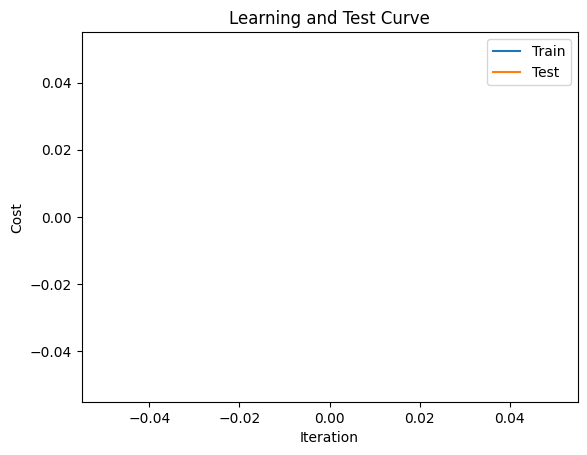

Accuracy: 93.86%


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class LogisticRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000, regularization_strength=0.0):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.regularization_strength = regularization_strength
        self.weights = None
        self.bias = None
        self.costs = []

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize_parameters(self, num_features):
        self.weights = np.zeros((num_features, 1))
        self.bias = 0

    def compute_cost(self, y, y_pred):
        m = len(y)
        cost = -1/m * np.sum(y * np.log(y_pred) + (1-y) * np.log(1-y_pred))
        return cost

    def compute_regularization_term(self):
        return (self.regularization_strength / (2 * len(self.weights))) * np.sum(self.weights**2)

    def train(self, X, y):
        m, num_features = X.shape
        self.initialize_parameters(num_features)

        for iteration in range(self.num_iterations):
            # Forward pass
            z = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(z)

            # Compute cost with regularization
            cost = self.compute_cost(y, y_pred) + self.compute_regularization_term()

            # Backward pass
            dz = y_pred - y
            dw = 1/m * np.dot(X.T, dz) + (self.regularization_strength / m) * self.weights
            db = 1/m * np.sum(dz)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Store cost for plotting
            self.costs.append(cost)

            # Print cost every 100 iterations
            if iteration % 100 == 0:
                print(f"Iteration {iteration}, Cost: {cost}")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = self.sigmoid(z)
        return np.round(y_pred)

    def plot_learning_and_test_curve(self, X_train, y_train, X_test, y_test):
        train_costs = []
        test_costs = []

        for iteration in range(self.num_iterations):
            # Forward pass on training set
            z_train = np.dot(X_train, self.weights) + self.bias
            y_pred_train = self.sigmoid(z_train)
            train_costs.append(self.compute_cost(y_train, y_pred_train))

            # Forward pass on test set
            z_test = np.dot(X_test, self.weights) + self.bias
            y_pred_test = self.sigmoid(z_test)
            test_costs.append(self.compute_cost(y_test, y_pred_test))

            # Backward pass and parameter updates (unchanged)

        # Plot both learning and test curves
        plt.plot(range(0, self.num_iterations), train_costs, label='Train')
        plt.plot(range(0, self.num_iterations), test_costs, label='Test')
        plt.xlabel("Iteration")
        plt.ylabel("Cost")
        plt.legend()
        plt.title("Learning and Test Curve")
        plt.show()

# Load data from CSV file
# (Assuming your data has columns 'radius_mean', 'texture_mean', and 'diagnosis')
csv_file_path = '/content/cancer_data.csv'
df = pd.read_csv(csv_file_path)

# Add polynomial features
X_poly = np.column_stack([df['radius_mean'], df['texture_mean'], df['radius_mean']**2, df['texture_mean']**2])

# Split the data into training and testing sets
train_size = int(0.8 * len(df))
X_train, X_test = X_poly[:train_size, :], X_poly[train_size:, :]
y_train, y_test = (df['diagnosis'] == 'M').astype(int).values[:train_size].reshape(-1, 1), (df['diagnosis'] == 'M').astype(int).values[train_size:].reshape(-1, 1)

# Instantiate and train the model
model = LogisticRegression(learning_rate=0.01, num_iterations=10000, regularization_strength=0.1)
model.train(X_train, y_train)

# Plot learning and test curves
model.plot_learning_and_test_curve(X_train, y_train, X_test, y_test)

# Make predictions on new data (test set)
y_pred_test = model.predict(X_test)

# Calculate and print accuracy
accuracy = np.mean(y_pred_test == y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")







